In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# 读取CSV文件
df = pd.read_csv("broker_data2024-09-23.csv")

In [8]:
filtered_df = df[df['bond_shrt_nm'] == '24国开05']
filtered_df
# 将'dl_tm'列转换为datetime格式
filtered_df['dl_tm'] = pd.to_datetime(filtered_df['dl_tm'])

# 提取日期部分，并过滤出2024年8月13日的数据
filtered_df['date'] = filtered_df['dl_tm'].dt.date
filtered_df_0813 = filtered_df[filtered_df['date'] == pd.to_datetime('2024-08-13').date()]


/var/folders/gj/bwfyx1ks0p17lbgn6fl1nx1c0000gp/T/ipykernel_95189/3763452393.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['dl_tm'] = pd.to_datetime(filtered_df['dl_tm'])
/var/folders/gj/bwfyx1ks0p17lbgn6fl1nx1c0000gp/T/ipykernel_95189/3763452393.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['date'] = filtered_df['dl_tm'].dt.date


/var/folders/gj/bwfyx1ks0p17lbgn6fl1nx1c0000gp/T/ipykernel_95189/473489765.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['dl_tm'] = pd.to_datetime(filtered_df['dl_tm'])
/var/folders/gj/bwfyx1ks0p17lbgn6fl1nx1c0000gp/T/ipykernel_95189/473489765.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['date'] = filtered_df['dl_tm'].dt.date
/var/folders/gj/bwfyx1ks0p17lbgn6fl1nx1c0000gp/T/ipykernel_95189/473489765.py:37: UserWarning: Glyph 26102 (\N{CJK UNIFIED IDEOGRAPH-65F6}) missi

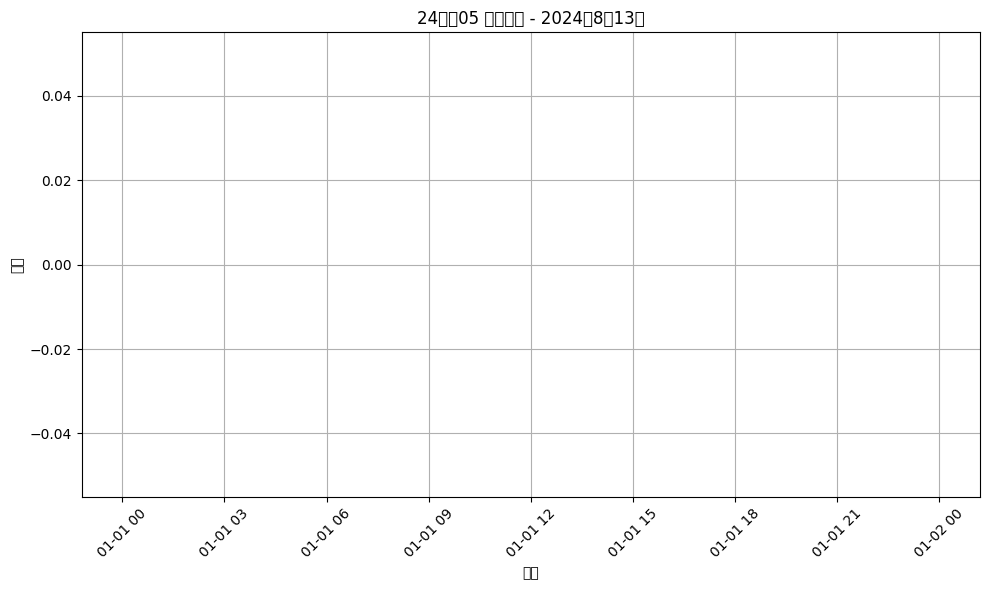

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# 读取CSV文件
df = pd.read_csv("broker_data2024-09-23.csv")

# 过滤出'24国开05'的记录
filtered_df = df[df['bond_shrt_nm'] == '24国开05']

# 将'dl_tm'列转换为datetime格式
filtered_df['dl_tm'] = pd.to_datetime(filtered_df['dl_tm'])

# 提取日期部分，并过滤出2024年8月13日的数据
filtered_df['date'] = filtered_df['dl_tm'].dt.date
filtered_df_0813 = filtered_df[filtered_df['date'] == pd.to_datetime('2024-08-13').date()]

# 计算价格的平均值和标准差
mean_price = filtered_df_0813['dlt_prc'].mean()
std_price = filtered_df_0813['dlt_prc'].std()

# 定义3σ的范围，剔除异常值
lower_bound = mean_price - 3 * std_price
upper_bound = mean_price + 3 * std_price
filtered_df_0813 = filtered_df_0813[(filtered_df_0813['dlt_prc'] >= lower_bound) & (filtered_df_0813['dlt_prc'] <= upper_bound)]

# 按时间'dl_tm'列进行升序排序
filtered_df_0813 = filtered_df_0813.sort_values(by='dl_tm')

# 绘制2024年8月13日的价格随时间变化图
plt.figure(figsize=(10, 6))
plt.plot(filtered_df_0813['dl_tm'], filtered_df_0813['dlt_prc'], marker='o', linestyle='-')
plt.title('24国开05 行情变化 - 2024年8月13日')
plt.xlabel('时间')
plt.ylabel('价格')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# 读取CSV文件并筛选特定债券数据
data = pd.read_csv('broker_data2024-09-23.csv')
filtered_data = data[data['bond_cd'] == 230210]

# 转换时间戳格式
filtered_data['timeStamp'] = pd.to_datetime(filtered_data['dl_tm'])

# 排序
sorted_data = filtered_data.sort_values(by='timeStamp', ascending=True)

# 计算均值和标准差
mean_net_prc = sorted_data['net_prc'].mean()
std_net_prc = sorted_data['net_prc'].std()

# 计算上下限
lower_limit = mean_net_prc - 3 * std_net_prc
upper_limit = mean_net_prc + 3 * std_net_prc

# 筛选出偏离平均值3倍标准差的异常行
outliers = sorted_data[(sorted_data['net_prc'] < lower_limit) | (sorted_data['net_prc'] > upper_limit)]

# 创建绘图
plt.figure(figsize=(14, 6))
plt.plot(sorted_data['timeStamp'], sorted_data['net_prc'], marker='o', markersize=3, label='Net Price')
plt.scatter(outliers['timeStamp'], outliers['net_prc'], color='red', label='Outliers')  # 添加异常值的红色点
plt.xlabel('Time')
plt.ylabel('Net Price')
plt.title('Net Price of Bond 230004 Over Time | Transaction sheet')
plt.xticks(rotation=30)
plt.grid(True)

# 调整 y 轴范围
plt.ylim(min(sorted_data['net_prc']) - 0.5, max(sorted_data['net_prc']) + 1)

# 添加图例
plt.legend()

plt.show()


/var/folders/gj/bwfyx1ks0p17lbgn6fl1nx1c0000gp/T/ipykernel_95189/1425227733.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['timeStamp'] = pd.to_datetime(filtered_data['dl_tm'])


KeyError: 'net_prc'